In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import modules and utilities

In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization'
%pwd 

/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization


'/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from util import load_sentences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load pre-processed English sentences 

In [4]:
directory = '/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization/data/'

sentences = load_sentences(directory + 'all_sentences_str.json')
sentences = np.array(sentences)
en_sentence_global_id = np.load(directory + 'en_sentence_global_id.npy')
de_sentence_global_id = np.load(directory + 'de_sentence_global_id.npy')

en_sentences = sentences[en_sentence_global_id]
de_sentences = sentences[de_sentence_global_id]

# other method
# en_sentences = np.load(directory + 'en_sentences.npy')
# de_sentences = np.load(directory + 'de_sentences.npy')

Sentences file - loaded
Done - appended all sentences
Number of tokenized sentences from corpus: 353786


In [5]:
print('Total number of English sentences:', len(en_sentences))
print('Total number of German sentences:', len(de_sentences))

Total number of English sentences: 127464
Total number of German sentences: 200627


# Obtain most frequent words (TF-High) as stopwords

These high frequency stopwords are used stored in class Stopwords in util.ipynb.

References: 
*   [On stopwords, filtering and data sparsity for sentiment
analysis of Twitter](http://oro.open.ac.uk/40666/1/292_Paper.pdf)
*   [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [6]:
def show_tf_high_terms(sentences: np.array, threshold = 5000, print_max = 500):
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(sentences)
  tf = X.sum(axis = 0)
  tf = np.array(tf).flatten()

  tf_indices_in_desc = tf.argsort()[::-1]
  tf_in_desc = np.take(tf, tf_indices_in_desc)

  # get rank for last term with tf >= threshold
  threshold = threshold
  last_rank_above_threshold = np.where(tf_in_desc >= threshold)[0][-1] + 1

  print('Number of distinct words:', len(tf_in_desc))
  print('Number of words with frequency > {}: {}, i.e. {:.2f}%'.format(threshold, last_rank_above_threshold, (last_rank_above_threshold/len(tf_in_desc))*100))
  print()

  print_max = print_max
  plt.axes(title = 'Frequency plot for first ' + str(print_max) + ' highest frequent terms', xlabel = 'Rank of words', ylabel = 'Frequency of words')
  plt.plot(tf_in_desc[0:print_max])
  label = str(last_rank_above_threshold) + ' terms with tf >= ' + str(threshold)
  ax = plt.gca()
  ymin, ymax = ax.get_ylim()
  plt.vlines(x = last_rank_above_threshold, ymin = ymin, ymax = ymax, colors = 'red', linestyles = 'dotted', label = 'left part of line: word frequency > ' + str(threshold))
  plt.legend()
  plt.show()

  stopwords = np.array(vectorizer.get_feature_names())
  stopwords = stopwords[tf_indices_in_desc[:last_rank_above_threshold ]]
  print()
  print('TF-High stopwords:')
  print(stopwords)

## English source, i.e. pre-processed sentences from NYTimes and Quora

Number of distinct words: 43255
Number of words with frequency > 5000: 52, i.e. 0.12%



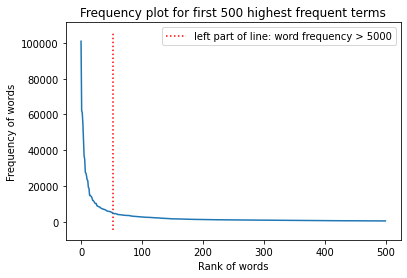


TF-High stopwords:
['the' 'and' 'to' 'of' 'is' 'in' 'that' 'organic' 'it' 'are' 'not' 'for'
 'you' 'food' 'as' 'have' 'be' 'on' 'with' 'they' 'or' 'but' 'this' 'from'
 'more' 'we' 'do' 'can' 'there' 'if' 'by' 'at' 'all' 'foods' 'about'
 'what' 'has' 'will' 'so' 'their' 'an' 'your' 'would' 'than' 'people' 'no'
 'which' 'like' 'was' 'one' 'some' 'my']


In [7]:
EN_TFHIGH = show_tf_high_terms(en_sentences)

# German Source, i.e. pre-processed sentences from Die Spiegel 

Number of distinct words: 73081
Number of words with frequency > 5000: 63, i.e. 0.09%



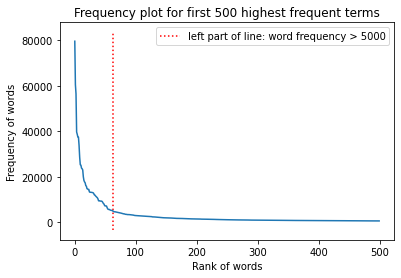


TF-High stopwords:
['die' 'und' 'der' 'ist' 'das' 'nicht' 'von' 'in' 'es' 'sie' 'zu' 'den'
 'ich' 'auch' 'mit' 'zitat' 'ein' 'sich' 'für' 'auf' 'man' 'sind' 'dass'
 'aber' 'werden' 'wie' 'im' 'nur' 'oder' 'wenn' 'eine' 'so' 'bei' 'als'
 'wird' 'aus' 'was' 'dem' 'noch' 'bio' 'an' 'dann' 'haben' 'kann' 'da'
 'hat' 'mehr' 'wir' 'um' 'mal' 'doch' 'schon' 'ja' 'nach' 'sein' 'keine'
 'immer' 'einen' 'des' 'gibt' 'hier' 'diese' 'durch']


In [8]:
DE_TFHIGH = show_tf_high_terms(de_sentences)